DRILL: Third Attempt
    
So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.

Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [1]:
# Import some libraries and packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
%matplotlib inline



In [2]:
# Load dataset:
y2015 = pd.read_csv(
    r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

In [3]:
# Look at the dataset:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [4]:
# Look at the type of data:
y2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(85), object(26)
memory usage: 356.6+ MB


In [5]:
# Findout columns with object type:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [6]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state'], 1, inplace=True) 

In [7]:
# Look at the tail of dataset:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [9]:
# Applying random forest model without feature reduction:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
score = cross_val_score(rfc, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.98 (+/- 0.01)


As you can see, The average accuracy in random forest model with all features is around 98%.

- Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.

- You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.


- First using correlation for reducing feature:

In [36]:
# Convert dataset to dummies:
X1 = y2015
X1 = pd.get_dummies(X1)
X1 = X1.dropna(axis=1)

In [12]:
# Findout high correlationship between dataset and current loan status: 
np.abs(X1.corr())[['loan_status_Current']].sort_values(by='loan_status_Current', ascending=False)

,loan_status_Current
loan_status_Current,1.000000
last_pymnt_d_Jan-2017,0.822902
loan_status_Fully Paid,0.753602
next_pymnt_d_Feb-2017,0.726260
last_credit_pull_d_Jan-2017,0.619326
last_pymnt_amnt,0.569426
out_prncp_inv,0.555196
out_prncp,0.555151
loan_status_Charged Off,0.400083
total_rec_prncp,0.389478


In [37]:
# Keep top features which have high correlation with current loan status as features then using randomforest model:

rfc = ensemble.RandomForestClassifier() 
X1 = X1[['last_pymnt_d_Jan-2017' ,'next_pymnt_d_Feb-2017', 'last_credit_pull_d_Jan-2017', 'last_pymnt_amnt', 'out_prncp_inv', 'out_prncp', 'total_rec_prncp', 'total_pymnt', 'total_pymnt_inv', 'last_credit_pull_d_Oct-2016']]
Y = y2015['loan_status']

score = cross_val_score(rfc, X1, Y, cv=10) 
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.93 (+/- 0.03)


The average accuracy in random forest model for high correlate features with current loan status is around 93%.

- Can you do it without using anything related to payment amount or outstanding principal? How do you know?

In [14]:
# Drop anything related to payment amount and then look at the correlation:
columns_ex_payment = y2015.drop(y2015.filter(like='pymnt', axis=1), axis=1)
X1 = pd.get_dummies(columns_ex_payment)
np.abs(X1.corr())[['loan_status_Current']].sort_values(by='loan_status_Current', ascending=False)


,loan_status_Current
loan_status_Current,1.000000
loan_status_Fully Paid,0.753602
last_credit_pull_d_Jan-2017,0.619326
out_prncp_inv,0.555196
out_prncp,0.555151
loan_status_Charged Off,0.400083
total_rec_prncp,0.389478
last_credit_pull_d_Oct-2016,0.297041
loan_status_Late (31-120 days),0.222884
last_credit_pull_d_Dec-2016,0.217303


In [15]:
# Keep top features which have high correlation with current loan status as features without anything related to payment amount then using randomforest model:

rfc = ensemble.RandomForestClassifier() 
X1 = X1[['last_credit_pull_d_Jan-2017', 'out_prncp_inv', 'out_prncp', 'total_rec_prncp', 'last_credit_pull_d_Oct-2016']]
Y = y2015['loan_status']

score = cross_val_score(rfc, X1, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.93 (+/- 0.04)


The average accuracy in random forest model for high correlate features with current loan status without any thing related to payment amount is around 93%. So the value of accuracy did not change without payment amount, hence the current loan status not related to payment amount.

- Second applying PCA for feature reduction:

In [16]:
# Applying PCA for feature reduction: 
X = y2015.drop('loan_status', 1)  
Y = y2015['loan_status']      
X = pd.get_dummies(X)
X = X.dropna(axis=1)

x = StandardScaler().fit_transform(X)
pca = PCA(0.90)
principalComponents = pca.fit_transform(x)

In [17]:
# Look at the pca components:
print(abs( pca.components_ ))

[[0.01199498 0.01208049 0.24231189 ... 0.00092666 0.0013254  0.00323749]
 [0.06724632 0.06725887 0.18235859 ... 0.00488207 0.00254287 0.00555124]
 [0.1539649  0.15380587 0.07100077 ... 0.01377332 0.0060633  0.0097518 ]
 ...
 [0.0045225  0.00454782 0.00213241 ... 0.05822126 0.01601528 0.05332065]
 [0.00293087 0.00290749 0.00320338 ... 0.02695839 0.0025349  0.0271431 ]
 [0.00256232 0.0027794  0.00320606 ... 0.01010159 0.00450728 0.00864609]]


In [18]:
# Findout number of components explained 90% of variance in the dataset:
pca_number = pca.n_components_
print(pca_number)

137


In [19]:
# print the percentage of total variance in the dataset explained by each components:
print(
    'The percentage of total variance in the dataset explained by each, component from Sklearn PCA.\n',
    pca.explained_variance_ratio_ ,pca.explained_variance_ratio_.sum() 
)

The percentage of total variance in the dataset explained by each, component from Sklearn PCA.
 [0.04610504 0.02648464 0.02563222 0.0203349  0.01620565 0.01379543
 0.0135162  0.01288324 0.01254677 0.01126894 0.01100379 0.00999676
 0.00962256 0.00909291 0.0088592  0.00877781 0.00877078 0.00870147
 0.00865557 0.00863986 0.00861108 0.0085896  0.00858672 0.00858605
 0.00858516 0.00858408 0.00858377 0.00858281 0.00858053 0.00856747
 0.00855334 0.00842235 0.00833853 0.00810817 0.00761256 0.00711625
 0.00690699 0.00652043 0.00643057 0.00631855 0.00620209 0.00613341
 0.00603752 0.00599323 0.00591014 0.0058862  0.00582444 0.00577468
 0.00570188 0.00568005 0.0056018  0.00556431 0.00554428 0.00548523
 0.00542692 0.00541238 0.00535354 0.00532215 0.00523316 0.00518648
 0.00512048 0.00509035 0.00502498 0.00499836 0.00497312 0.00496578
 0.00494903 0.00484582 0.00482551 0.00477895 0.00473095 0.00470706
 0.00469144 0.00465691 0.00464848 0.00463837 0.00460708 0.00459543
 0.00457841 0.00455081 0.00454527

In [20]:
# Convert PCA to dataframe:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca' + str(i) for i in range (1, pca_number+1)])


In [21]:
# Concat pca with target variable:
finaldf = pd.concat([principalDf, Y], axis = 1)
finaldf.head(5)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca129,pca130,pca131,pca132,pca133,pca134,pca135,pca136,pca137,loan_status
0,3.867022,2.670755,-3.082466,2.930266,-1.741520,-2.074702,-0.952140,-0.145406,1.112194,1.357450,...,1.123543,1.436439,-1.165173,-1.259129,2.805004,-0.344302,-0.479563,-0.210817,0.071834,Current
1,-3.276573,0.168041,-2.272640,3.181106,-0.667978,-2.063558,-1.074393,0.076391,1.234233,0.703191,...,0.295822,0.081057,-0.625019,0.133166,-0.381724,0.066613,0.322926,-0.130111,0.111338,Current
2,2.562312,-4.149254,1.671825,3.544542,0.308982,0.699537,-3.931742,0.097269,1.883482,-0.742389,...,-0.048008,0.593373,2.003913,0.330045,-0.880492,-0.008068,-0.162439,0.161891,0.076952,Fully Paid
3,4.190814,0.561740,-2.972380,2.319152,-1.115215,1.626803,-3.183215,0.088938,1.104619,0.878514,...,0.278104,0.258794,-0.533640,0.692448,-0.455830,-0.073737,-0.071908,0.031437,-0.022264,Current
4,-0.337957,4.031721,5.313863,-3.934436,1.070756,-2.708323,-3.464242,-0.025626,3.036238,-1.840687,...,-0.628918,-0.687234,1.394383,1.346225,-1.875077,2.893174,0.760178,2.961773,0.823800,Fully Paid


In [22]:
# Look at the datatype:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Columns: 138 entries, pca1 to loan_status
dtypes: float64(137), object(1)
memory usage: 443.4+ MB


In [23]:
# Applying random forest model with pca dataset:
rfc = ensemble.RandomForestClassifier()
X = finaldf.drop('loan_status', 1)   
Y = finaldf['loan_status']

score = cross_val_score(rfc, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Accuracy: 0.94 (+/- 0.02)


As you can see; after applying PCA for features reduction, the average accuracy of random forest with new dataset (pca dataset) is around 94%. The accuracy increased a little bit.(1%)

- Can you do it without using anything related to payment amount or outstanding principal? How do you know?

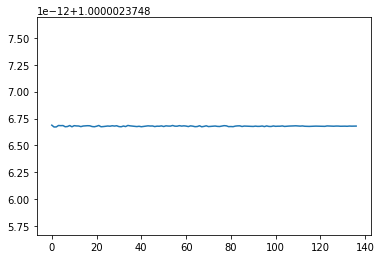

In [24]:
# Use eig_val plot to visualize how many components describe more percentage of variance in the dataset:
x= finaldf.drop('loan_status', 1)
x=StandardScaler().fit_transform(x)
Xt = x.T                               
Cx = np.cov(Xt)              
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
                                                
# print scree plot
plt.plot(eig_val_cov)
plt.show()



In [25]:
# get the index of the most important feature on EACH component?
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca_number)]

dic = {'PC{}'.format(i): most_important[i] for i in range(pca_number)}

# build the dataframe
df = pd.DataFrame(dic.items())
print(df.sort_values(by=1, ascending=False))

         0    1
8      PC8  231
93    PC93  229
43    PC43  228
133  PC133  221
66    PC66  221
51    PC51  220
44    PC44  219
54    PC54  218
53    PC53  217
130  PC130  210
45    PC45  209
118  PC118  203
39    PC39  201
61    PC61  199
60    PC60  198
135  PC135  194
58    PC58  194
62    PC62  192
136  PC136  192
50    PC50  190
42    PC42  188
41    PC41  187
59    PC59  183
38    PC38  181
57    PC57  180
56    PC56  180
40    PC40  176
35    PC35  173
121  PC121  171
19    PC19  168
..     ...  ...
49    PC49   68
48    PC48   68
65    PC65   68
77    PC77   67
92    PC92   66
90    PC90   66
88    PC88   65
55    PC55   63
47    PC47   62
46    PC46   62
52    PC52   61
10    PC10   57
34    PC34   48
1      PC1   45
127  PC127   34
131  PC131   33
132  PC132   33
4      PC4   29
134  PC134   28
67    PC67   28
89    PC89   25
9      PC9   23
128  PC128   21
2      PC2   16
33    PC33   12
11    PC11    9
129  PC129    8
3      PC3    5
0      PC0    4
6      PC6    1

[137 ro

- I think for removing outstanding components, we can remove some number of first components, because they explain most variance.

In [26]:
# Applying random forest model with remove 30 number of first rows or components of pca dataset :
rfc = ensemble.RandomForestClassifier()
X = finaldf.drop('loan_status', 1)
X = X.iloc[:, 30:]
Y = finaldf['loan_status']

score = cross_val_score(rfc, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.90 (+/- 0.04)


As you can see, after removing 30 number of first components from pca dataset, the accuracy decreased around 4%.

- For making model wihout using anything related to payment amount:

In [27]:
# Select all columns contain'pymnt':
columns_ex_payment = y2015.drop(y2015.filter(like='pymnt', axis=1), axis=1)


In [28]:
# Applying PCA for feature reduction:
X = columns_ex_payment.drop('loan_status', 1)
Y = columns_ex_payment['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
c = X.isnull().sum()
x = StandardScaler().fit_transform(X)
pca = PCA(0.90)
principalComponents = pca.fit_transform(x)

In [29]:
# Look at the pca components:
print(abs( pca.components_ ))

[[3.29378500e-03 3.20113934e-03 2.29503809e-01 ... 1.37130534e-03
  1.49690451e-03 3.35734627e-03]
 [1.77264190e-02 1.76329864e-02 2.18403961e-01 ... 1.25461568e-02
  5.96474936e-03 1.09809453e-02]
 [7.45373832e-02 7.44410180e-02 7.97816122e-02 ... 6.67535025e-03
  7.02082574e-03 1.08809995e-02]
 ...
 [1.67123727e-03 2.73446232e-03 2.61126104e-03 ... 3.94315419e-02
  1.50626888e-01 3.79553213e-02]
 [1.39007678e-02 1.41387094e-02 4.68804818e-05 ... 1.64000050e-02
  6.23341004e-02 5.72247721e-02]
 [2.67092903e-03 1.87086097e-03 5.13886334e-03 ... 4.91859327e-02
  1.25693723e-01 1.08800087e-02]]


In [30]:
# Findout number of components explained 90% of variance in the dataset:
pca_number = pca.n_components_
print(pca_number)

118


In [31]:
# print the percentage of total variance in the dataset explained by each components:
print(
    'The percentage of total variance in the dataset explained by each, component from Sklearn PCA.\n',
    pca.explained_variance_ratio_ ,pca.explained_variance_ratio_.sum() 
)

The percentage of total variance in the dataset explained by each, component from Sklearn PCA.
 [0.05013034 0.02923469 0.02360113 0.01974656 0.01785705 0.01583965
 0.01493806 0.01490549 0.0132587  0.01274693 0.01155631 0.01114035
 0.01099449 0.01025974 0.01021818 0.01009157 0.01005642 0.01003229
 0.01000411 0.0099621  0.00995644 0.00995365 0.00995213 0.00995164
 0.00995064 0.00995029 0.00994869 0.00994644 0.00992953 0.00991496
 0.00984572 0.00964126 0.00957075 0.00937491 0.00882147 0.00798052
 0.00787905 0.00747358 0.00674591 0.00659898 0.00642206 0.00628369
 0.00579794 0.00578173 0.00565476 0.00561915 0.00559145 0.00552158
 0.00549965 0.0054702  0.00544541 0.00541535 0.00540442 0.00537766
 0.00536922 0.00536142 0.00531961 0.00530537 0.00528431 0.00528249
 0.00525472 0.00523153 0.00521008 0.00520261 0.00519718 0.00515501
 0.00512054 0.00511452 0.00510169 0.00508665 0.00507053 0.00506757
 0.00504775 0.00503567 0.00501379 0.00501318 0.00501198 0.00500142
 0.00499936 0.00499717 0.00499192

In [32]:
# Convert PCA to dataframe:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca' + str(i) for i in range (1, pca_number+1)])


In [33]:
# Concat PCA with target variable:
finaldf = pd.concat([principalDf, Y], axis = 1)
finaldf.head(5)

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca110,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,loan_status
0,4.643423,0.321407,3.475300,-3.884938,-0.153765,0.781682,-0.155714,-0.033276,0.743429,2.961175,...,-0.050477,-0.141281,0.057980,0.014017,0.201517,-0.249010,0.284570,0.710908,0.099389,Current
1,-2.937378,-0.757363,3.535389,-2.527017,0.853830,0.868309,0.027848,0.031269,1.462542,-0.781380,...,0.034096,-0.075459,0.281066,0.391965,0.012458,-0.038996,0.253199,0.522568,-0.111393,Current
2,1.105401,-2.676660,3.159340,0.712377,0.745760,-2.784301,-0.181044,0.481522,2.301530,0.239907,...,-0.001215,0.006995,-0.048161,0.086350,0.112237,-0.169493,0.170903,0.155097,-0.103802,Fully Paid
3,4.440424,-1.244359,2.709921,-2.645471,0.044925,-3.421069,-0.003772,0.191148,0.895205,1.373950,...,-0.042421,-0.004463,-0.100697,0.069203,0.133053,-0.088400,0.199039,0.188804,-0.025184,Current
4,-0.235725,5.889222,-4.213898,-0.162952,2.445799,0.344854,-0.391469,0.309963,3.708779,1.394776,...,0.991426,-0.188384,0.134669,-0.414231,0.011583,-0.374902,1.179751,0.226414,-0.648122,Fully Paid


In [34]:
# Using random forest model with pca without anything related to payment:
rfc = ensemble.RandomForestClassifier()
X = finaldf.drop('loan_status', 1)
Y = finaldf['loan_status']

score = cross_val_score(rfc, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.79 (+/- 0.20)


As you can see, after removing all columns related to payment amount and then applying Pca, the accuracy decreased very much. 